In [1]:
import csv
import time
import numpy as np
import copy
import math
from math import inf
import matplotlib.pyplot as plt

In [2]:
# reference: https://www.geeksforgeeks.org/python-program-to-get-all-subsets-of-given-size-of-a-set/
# find all subsets of a given set
import itertools 

def findsubsets(s, n): 
    return [set(i) for i in itertools.combinations(s, n)] 

In [3]:
def graph_from_coord(d):
    '''
    This functions creats and array for distance between the cities given
    a list of list contains coordinates of all cities
    
    Inputs: 
            d: list of lists contains coordinates of all cities
            
    Outputs:
            c: a 2D arraay where c[i,j] is distance between cities i, j (length of edges)
    '''
    n = len(d)
    c = np.empty([n,n])
    for i in range(0,n): # for all
        i_x = d[i][0]
        i_y = d[i][1] 
        for j in range(0,n):
            j_x = d[j][0]
            j_y = d[j][1]
            c[i,j] = math.sqrt((i_x-j_x)**2 + (i_y-j_y)**2)
            
    return c

In [4]:

def TSP(c):
    '''
    This function finds the length of shortest path in Travel Salesman Path (TSP) problem.
    
    Inputs: 
            c: a 2D arraay where c[i,j] is distance between cities i, j (length of edges)
    
    Outputs:
            A: the hashtable (array) in the TSP algorithm. e.g. A['{1,6,9,15}6'] means the length
            of the path from vortex 1 to 6 with visiting vertices 1,6,9,15 only once
            
            min_value: the shortest tour in Travel Salesman Path problem (length of 
            shortest path to visit all cities only once)
    '''
    n = c.shape[0]
    one_to_n = set(i for i in range(1,n+1)) # a set of all numbers from 1 to n
    two_to_n = set(i for i in range(2,n+1)) # a set of all numbers from 2 to n

    A = {}
    # Base case
    S = {1}
    A[str(S)+str(1)] = 0
    for m in range(2,n+1): # m is subproblem size
        all_S_from_two = findsubsets(two_to_n, m-1) # all subset two_to_n with size m-1
        all_S = [{1}|i for i in all_S_from_two] # add one to all elements of all_S_from_two
        for S in all_S:
            S = set(sorted(S)) # sort S
            A[str(S)+str(1)] = inf


    for m in range(2,n+1): # m is subproblem size
        all_S_from_two = findsubsets(two_to_n, m-1) # all subset two_to_n with size m-1
        all_S = [{1}|i for i in all_S_from_two] # add one to all elements of all_S_from_two
        for S in all_S:
            S = set(sorted(S)) # sort S
            for j in S:
                min_value = inf
                if j != 1:
                    for k in S:
                        if k != j:
                            S_minus_j = S - {j}  
                            S_minus_j = set(sorted(S_minus_j)) # sort S_minus_j
                            current_value = A[str(S_minus_j)+str(k)] + c[k-1,j-1]
                            if current_value < min_value:
                                A[str(S)+str(j)] = current_value
                                min_value = A[str(S)+str(j)]

    # finding shortest path
    min_value = inf
    for j in range(2,n+1):
        if (A[str(one_to_n)+str(j)] + c[j-1,0]) < min_value:
            min_value = A[str(one_to_n)+str(j)] + c[j-1,0]
            
    return A, min_value


In [35]:
# plotting the points
def TSP_path(n, A, c):
    '''
    This function finds all cities visited in orders in TSP problem
    
    Inputs:
            A: the hashtable (array) in the TSP algorithm. e.g. A['{1,6,9,15}6'] means the length
            of the path from vortex 1 to 6 with visiting vertices 1,6,9,15 only once
    Outputs:
            Cities: a list of all cities ordered from last to 1 which are visited.
    
    '''
    Cities = []
    S = set(i for i in range(1,n+1)) # a set of all numbers from 1 to n
    prev_last_index = 1 # previous step last vortex
    while len(S) > 1:
        min_value = inf
        for j in range(2,n+1):
            if not j in Cities:
                if (A[str(S)+str(j)]  + c[j-1,prev_last_index-1]) < min_value:
                    min_value = A[str(S)+str(j)] + c[j-1,prev_last_index-1]
                    last_index = j
        
        Cities.append(last_index)
        prev_last_index = last_index  # updating previous step last vortex
        S = set(sorted(S - {last_index}))
    
    Cities.append(1)
    return Cities


def plot_TSP(Cities):
    
    '''
    This function plots all cities visited in orders in TSP problem and reports the total distance
    of the tour in TSP problem
    
    Inputs:
            Cities: a list of all cities ordered from last to 1 which are visited.
            
    Outputs:
            a plot of the path traveled between cities with the length of each edge.
            
            tot_dist: the total distance of the tour in TSP problem.
    
    '''
    tot_dist = 0
    plt.figure(figsize=(15,10))
    for i in range(len(Cities)-1):
        first_point = Cities[i]
        second_point = Cities[i+1]
        
        first_point_x = d[first_point-1][0]
        first_point_y = d[first_point-1][1]
        
        second_point_x = d[second_point-1][0]
        second_point_y = d[second_point-1][1]
        
        x_values = [first_point_x, second_point_x]
        y_values = [first_point_y, second_point_y]
        
        plt.plot(x_values, y_values)
        plt.text(first_point_x, first_point_y, str(first_point))
        
        # distance between first_point and second_point
        dist = math.sqrt((first_point_x-second_point_x)**2 + (first_point_y-second_point_y)**2)
        # puting distance as a text on the middle of the edge
        mid_x = 0.5 * (first_point_x+second_point_x)
        mid_y = 0.5 * (first_point_y+second_point_y)
        plt.text(mid_x, mid_y, str(round(dist,2)), color='green')
        tot_dist += dist # to check total travel distance
    
    
    # to draw last edge (from last vortex to 1)
    first_point = Cities[-1]
    second_point = Cities[0]
    first_point_x = d[first_point-1][0]
    first_point_y = d[first_point-1][1]

    second_point_x = d[second_point-1][0]
    second_point_y = d[second_point-1][1]

    x_values = [first_point_x, second_point_x]
    y_values = [first_point_y, second_point_y]

    plt.plot(x_values, y_values)
    plt.text(first_point_x, first_point_y, str(first_point))

    # distance between first_point and second_point
    dist = math.sqrt((first_point_x-second_point_x)**2 + (first_point_y-second_point_y)**2)
    # puting distance as a text on the middle of the edge
    mid_x = 0.5 * (first_point_x+second_point_x)
    mid_y = 0.5 * (first_point_y+second_point_y)
    plt.text(mid_x, mid_y, str(round(dist,2)), color='green')
    tot_dist += dist # to check total travel distance
    
    return tot_dist

## Examples


 ______The shortest tour to travel has length of:_________
12.36

 ______The cities to visit:_________
[3, 5, 8, 6, 2, 7, 4, 1]

 ______The shortest tour to travel has length of (from the figure to double check):_________
12.364804397553605

 --- 0.018972396850585938 seconds ---


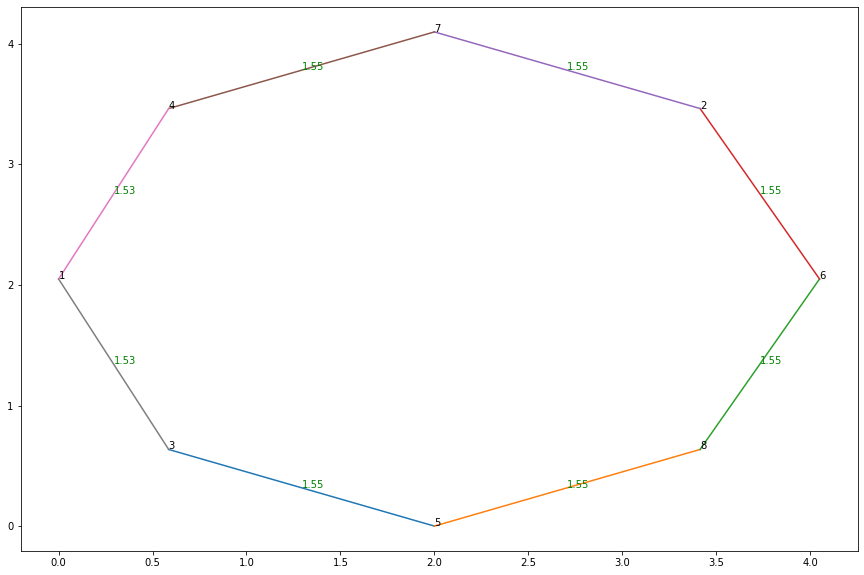

In [36]:
# reading the input file as a list
with open('Test_01_12.36.txt') as f:
    reader = csv.reader(f, delimiter=" ")
    d = list(reader)

n  = int(d[0][0]) # n is number of cities
d.pop(0)

d = [[float(i[0]),float(i[1])] for i in d] # convert d into integers


c = graph_from_coord(d) # array of cities distances

start_time = time.time()
A, shortest_path = TSP(c)
print('\n ______The shortest tour to travel has length of:_________')
print(round(shortest_path,2))

Cities = TSP_path(n, A, c)
print('\n ______The cities to visit:_________')
print(Cities)
tot_dist = plot_TSP(Cities)

print('\n ______The shortest tour to travel has length of (from the figure to double check):_________')
print(tot_dist)

print("\n --- %s seconds ---" % (time.time() - start_time))


 ______The shortest tour to travel has length of:_________
14.0

 ______The cities to visit:_________
[3, 2, 4, 1]

 ______The shortest tour to travel has length of (from the figure to double check):_________
14.0

 --- 0.010973453521728516 seconds ---


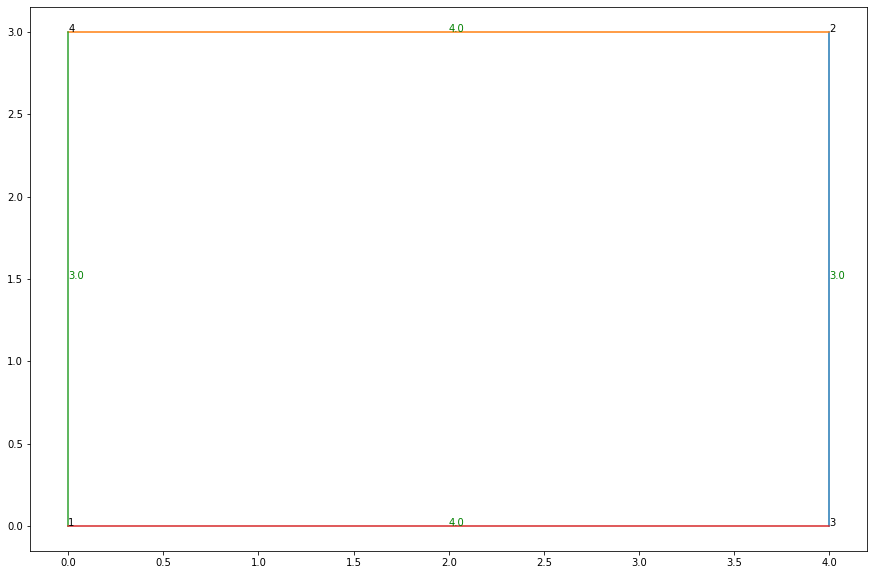

In [37]:
# reading the input file as a list
with open('Test_02_14.00.txt') as f:
    reader = csv.reader(f, delimiter=" ")
    d = list(reader)

n  = int(d[0][0]) # n is number of cities
d.pop(0)

d = [[float(i[0]),float(i[1])] for i in d] # convert d into integers


c = graph_from_coord(d) # array of cities distances

start_time = time.time()
A, shortest_path = TSP(c)
print('\n ______The shortest tour to travel has length of:_________')
print(round(shortest_path,2))

Cities = TSP_path(n, A, c)
print('\n ______The cities to visit:_________')
print(Cities)
tot_dist = plot_TSP(Cities)

print('\n ______The shortest tour to travel has length of (from the figure to double check):_________')
print(tot_dist)

print("\n --- %s seconds ---" % (time.time() - start_time))


 ______The shortest tour to travel has length of:_________
4.41

 ______The cities to visit:_________
[2, 3, 4, 5, 1]

 ______The shortest tour to travel has length of (from the figure to double check):_________
4.414213562373095

 --- 0.012985467910766602 seconds ---


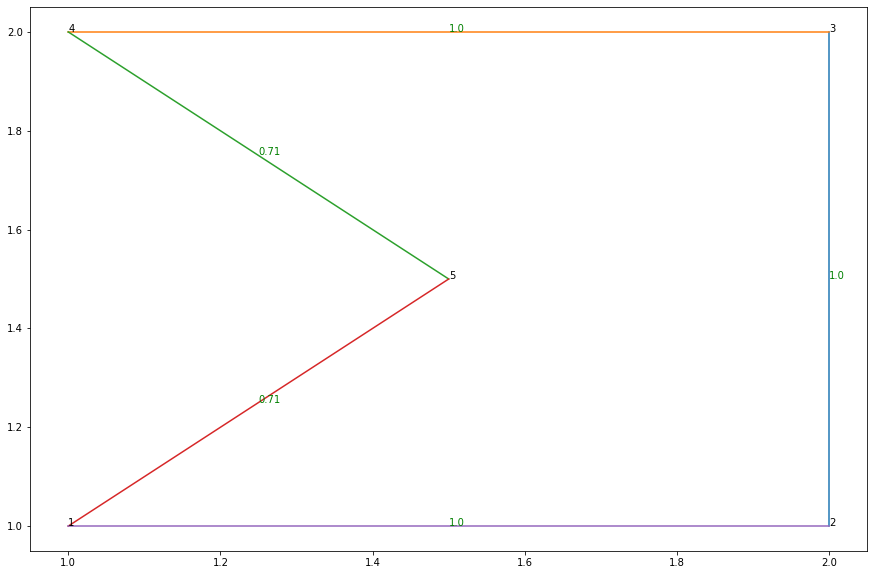

In [38]:
# reading the input file as a list
with open('Test_03_4.41.txt') as f:
    reader = csv.reader(f, delimiter=" ")
    d = list(reader)

n  = int(d[0][0]) # n is number of cities
d.pop(0)

d = [[float(i[0]),float(i[1])] for i in d] # convert d into integers


c = graph_from_coord(d) # array of cities distances

start_time = time.time()
A, shortest_path = TSP(c)
print('\n ______The shortest tour to travel has length of:_________')
print(round(shortest_path,2))

Cities = TSP_path(n, A, c)
print('\n ______The cities to visit:_________')
print(Cities)
tot_dist = plot_TSP(Cities)

print('\n ______The shortest tour to travel has length of (from the figure to double check):_________')
print(tot_dist)

print("\n --- %s seconds ---" % (time.time() - start_time))


 ______The shortest tour to travel has length of:_________
14662.0

 ______The cities to visit:_________
[2, 6, 10, 11, 12, 13, 9, 7, 3, 4, 8, 5, 1]

 ______The shortest tour to travel has length of (from the figure to double check):_________
14662.0046407879

 --- 0.5405290126800537 seconds ---


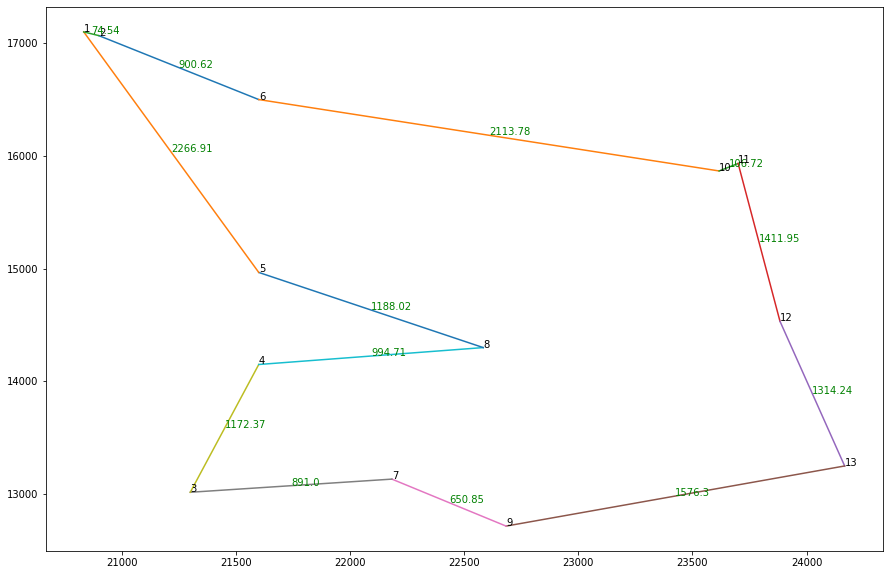

In [39]:
# reading the input file as a list
with open('tsp_1to13.txt') as f:
    reader = csv.reader(f, delimiter=" ")
    d = list(reader)

n  = int(d[0][0]) # n is number of cities
d.pop(0)

d = [[float(i[0]),float(i[1])] for i in d] # convert d into integers


c = graph_from_coord(d) # array of cities distances

start_time = time.time()
A, shortest_path = TSP(c)
print('\n ______The shortest tour to travel has length of:_________')
print(round(shortest_path,2))

Cities = TSP_path(n, A, c)
print('\n ______The cities to visit:_________')
print(Cities)
tot_dist = plot_TSP(Cities)

print('\n ______The shortest tour to travel has length of (from the figure to double check):_________')
print(tot_dist)

print("\n --- %s seconds ---" % (time.time() - start_time))


 ______The shortest tour to travel has length of:_________
14409.2

 ______The cities to visit:_________
[2, 3, 5, 13, 14, 9, 6, 10, 12, 11, 7, 8, 4, 1]

 ______The shortest tour to travel has length of (from the figure to double check):_________
14409.202165641733

 --- 1.3163526058197021 seconds ---


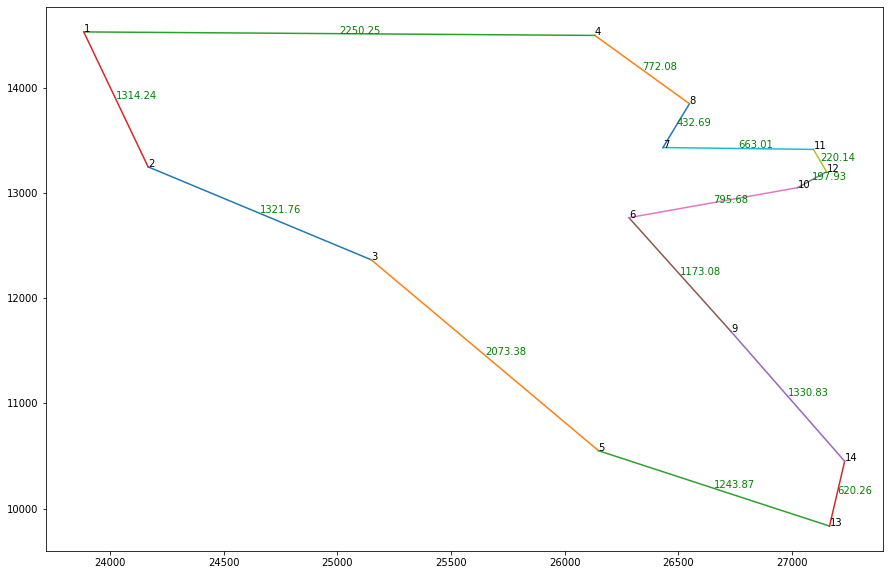

In [40]:
# reading the input file as a list
with open('tsp_12to25.txt') as f:
    reader = csv.reader(f, delimiter=" ")
    d = list(reader)

n  = int(d[0][0]) # n is number of cities
d.pop(0)

d = [[float(i[0]),float(i[1])] for i in d] # convert d into integers


c = graph_from_coord(d) # array of cities distances

start_time = time.time()
A, shortest_path = TSP(c)
print('\n ______The shortest tour to travel has length of:_________')
print(round(shortest_path,2))

Cities = TSP_path(n, A, c)
# Cities = [i+11 for i in Cities] # adding 11 to node numbers (because the file is edites) to keep to vortex numbers consistent
print('\n ______The cities to visit:_________')
print(Cities)
tot_dist = plot_TSP(Cities)

print('\n ______The shortest tour to travel has length of (from the figure to double check):_________')
print(tot_dist)

print("\n --- %s seconds ---" % (time.time() - start_time))

In [41]:
# The full TSP is combination two simpler above TSPs where edge 12 t o13 is excessive
# TSP(1 to 13) + TSP (12 to 25) - 2 * edge (12 to 13)
# 14662.0046407879 + 14409.202165641733 - 2 * 1314.24
round(14662.0046407879 + 14409.202165641733 -  2 * 1314.2382487374398 , 2)

26442.73